In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from pandas import DataFrame
from datetime import datetime,tzinfo
from pytz import timezone
import time
import pytz
import csv

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('crypto-markets.csv')
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [3]:
bitcoin = df[(df['name'] == 'Bitcoin') & (df['volume'] != 0)]
bitcoin.shape

(1799, 13)

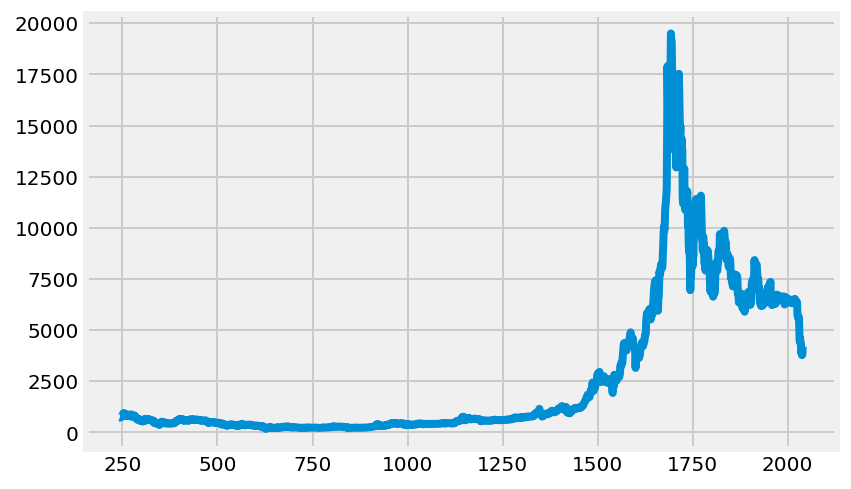

In [4]:
plt.plot(bitcoin['close'])

In [5]:
bitcoin.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
243,bitcoin,BTC,Bitcoin,2013-12-27,1,763.28,777.51,713.60,735.07,46862700.0,8.955395e+09,0.3359,63.91
244,bitcoin,BTC,Bitcoin,2013-12-28,1,737.98,747.06,705.35,727.83,32505800.0,8.869919e+09,0.5390,41.71
245,bitcoin,BTC,Bitcoin,2013-12-29,1,728.05,748.61,714.44,745.05,19011300.0,9.082104e+09,0.8958,34.17
246,bitcoin,BTC,Bitcoin,2013-12-30,1,741.35,766.60,740.24,756.13,20707700.0,9.217168e+09,0.6028,26.36
247,bitcoin,BTC,Bitcoin,2013-12-31,1,760.32,760.58,738.17,754.01,20897300.0,9.191325e+09,0.7068,22.41


In [6]:
price=bitcoin['close']
windows = [2, 7, 30, 90, 365]
# Calculate the sd and volatility
for window in windows:
    mean=price.rolling(window).mean()
    sd=price.rolling(window).std()
    vol = price.rolling(window).std() * np.sqrt(window) 
    col_index = str(window) + ' Day' + ' Rolling Mean'
    
    bitcoin[str(window) + ' Day' + ' Rolling Mean']=mean
    bitcoin[str(window) + ' Day' + ' Volatility']=vol
    bitcoin[str(window) + ' Day' + ' SD']=sd

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value i

In [7]:
synthetic_col_names = bitcoin.columns[13:28]
bitcoin[synthetic_col_names].head(10)

,2 Day Rolling Mean,2 Day Volatility,2 Day SD,7 Day Rolling Mean,7 Day Volatility,7 Day SD,30 Day Rolling Mean,30 Day Volatility,30 Day SD,90 Day Rolling Mean,90 Day Volatility,90 Day SD,365 Day Rolling Mean,365 Day Volatility,365 Day SD
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,731.450,7.24,5.119453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,736.440,17.22,12.176379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,750.590,11.08,7.834743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,755.070,2.12,1.499066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,762.705,17.39,12.296587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,786.895,30.99,21.913239,755.982857,66.096878,24.982272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,810.555,16.33,11.547054,767.932857,85.347985,32.258506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,839.115,40.79,28.842886,786.744286,110.915123,41.921976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,896.520,74.02,52.340044,813.670000,171.727353,64.906839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Fill in the NaN values for the first window - 1 entries in each window column
for i in np.arange(13,28):
    col_name = bitcoin.columns[i]
    bitcoin[col_name].fillna(bitcoin[col_name].unique()[1], inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [9]:
bitcoin[synthetic_col_names].head(20)

,2 Day Rolling Mean,2 Day Volatility,2 Day SD,7 Day Rolling Mean,7 Day Volatility,7 Day SD,30 Day Rolling Mean,30 Day Volatility,30 Day SD,90 Day Rolling Mean,90 Day Volatility,90 Day SD,365 Day Rolling Mean,365 Day Volatility,365 Day SD
243,731.450,7.24,5.119453,755.982857,66.096878,24.982272,831.439333,301.138604,54.980135,715.505333,1093.682953,115.284306,533.10337,2839.291943,148.615333
244,731.450,7.24,5.119453,755.982857,66.096878,24.982272,831.439333,301.138604,54.980135,715.505333,1093.682953,115.284306,533.10337,2839.291943,148.615333
245,736.440,17.22,12.176379,755.982857,66.096878,24.982272,831.439333,301.138604,54.980135,715.505333,1093.682953,115.284306,533.10337,2839.291943,148.615333
246,750.590,11.08,7.834743,755.982857,66.096878,24.982272,831.439333,301.138604,54.980135,715.505333,1093.682953,115.284306,533.10337,2839.291943,148.615333
247,755.070,2.12,1.499066,755.982857,66.096878,24.982272,831.439333,301.138604,54.980135,715.505333,1093.682953,115.284306,533.10337,2839.291943,148.615333
248,762.705,17.39,12.296587,755.982857,66.096878,24.982272,831.439333,301.138604,54.980135,715.505333,1093.682953,115.284306,533.10337,2839.291943,148.615333
249,786.895,30.99,21.913239,755.982857,66.096878,24.982272,831.439333,301.138604,54.980135,715.505333,1093.682953,115.284306,533.10337,2839.291943,148.615333
250,810.555,16.33,11.547054,767.932857,85.347985,32.258506,831.439333,301.138604,54.980135,715.505333,1093.682953,115.284306,533.10337,2839.291943,148.615333
251,839.115,40.79,28.842886,786.744286,110.915123,41.921976,831.439333,301.138604,54.980135,715.505333,1093.682953,115.284306,533.10337,2839.291943,148.615333
252,896.520,74.02,52.340044,813.670000,171.727353,64.906839,831.439333,301.138604,54.980135,715.505333,1093.682953,115.284306,533.10337,2839.291943,148.615333


In [10]:
def isEventBaseline(row):
    diff = abs(row['close'] - row['7 Day Rolling Mean'])
    if diff >= 2 * row['7 Day SD']:
        return 1
    else:
        return 0
    
bitcoin['isEventBaseline'] = bitcoin.apply(isEventBaseline, axis=1)
bitcoin['isEventBaseline'].value_counts()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    1728
1      71
Name: isEventBaseline, dtype: int64

In [11]:
df = bitcoin[['open', 'high', 'low', 'close', 'volume', 'market', 'close_ratio', 
              'spread', '7 Day Rolling Mean', '7 Day SD', '7 Day Volatility', 'isEventBaseline']]

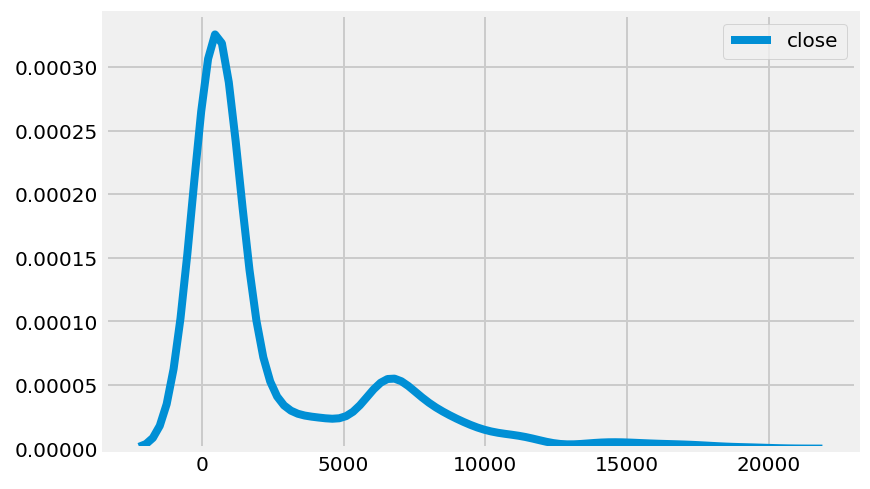

In [12]:
sns.kdeplot(df['close'])

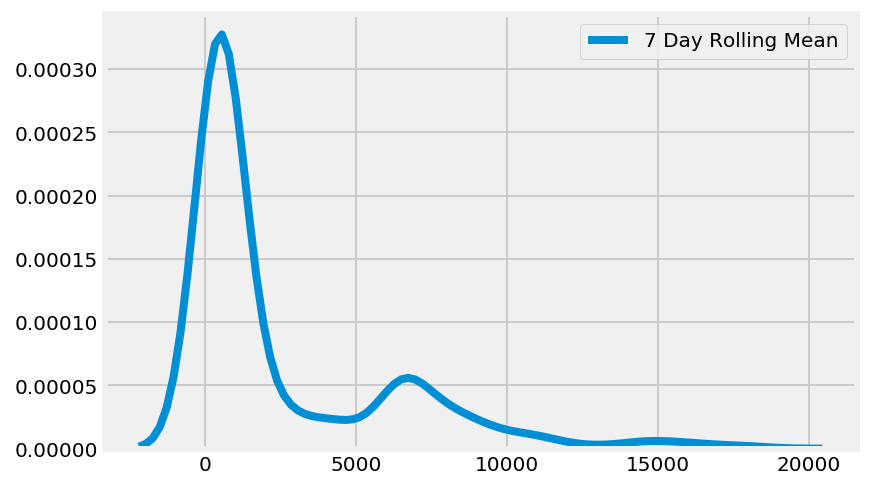

In [13]:
sns.kdeplot(df['7 Day Rolling Mean'])

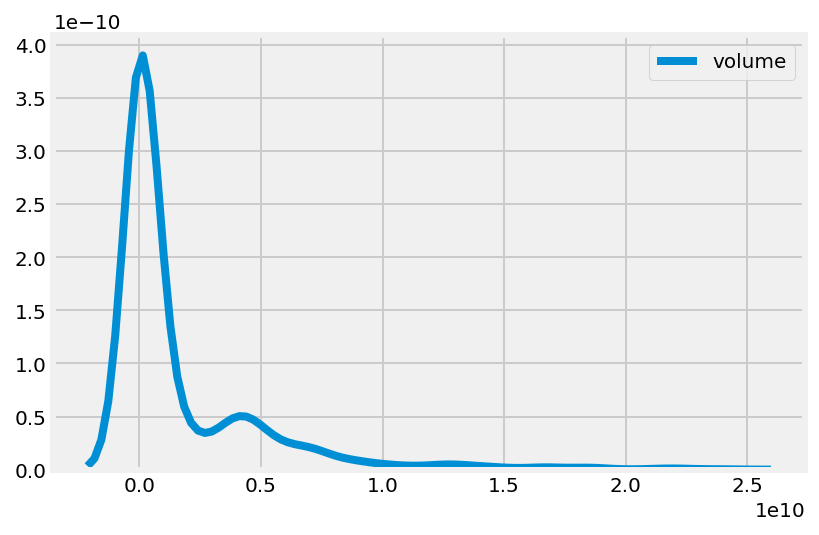

In [14]:
sns.kdeplot(df['volume'])

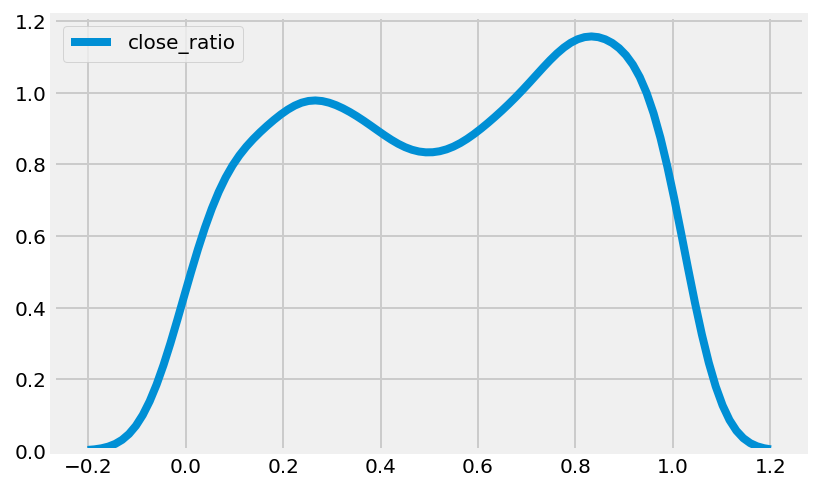

In [15]:
sns.kdeplot(df['close_ratio'])

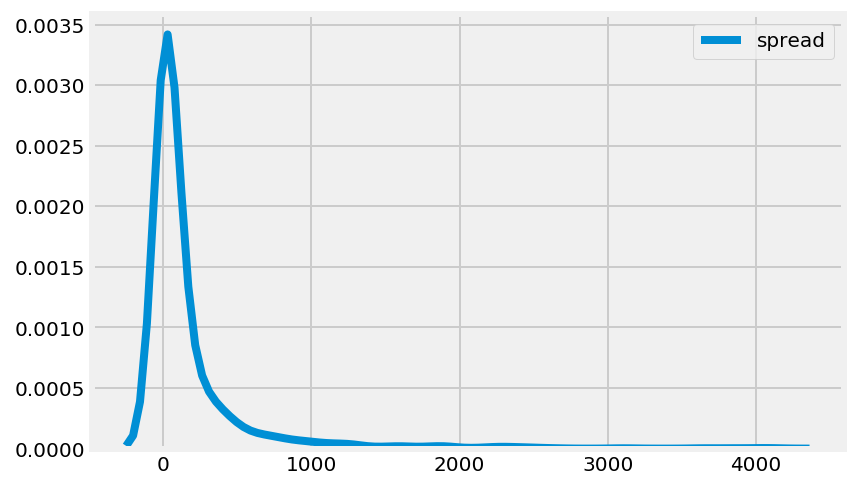

In [16]:
sns.kdeplot(df['spread'])

In [17]:
df.isna().sum() / len(df)

open                  0.0
high                  0.0
low                   0.0
close                 0.0
volume                0.0
market                0.0
close_ratio           0.0
spread                0.0
7 Day Rolling Mean    0.0
7 Day SD              0.0
7 Day Volatility      0.0
isEventBaseline       0.0
dtype: float64

In [18]:
df.to_csv('baseline_def_kaggle.csv')

## Results

After careful data cleaning, manipulation, feature selection, and copious trial and error, we were able to generate some pretty interesting findings through the EDA process. There are two major findings, one pertaining to the baseline definition of an _event_ (significant price change), and the other pertaining to the data used for this analysis.

#### Baseline Definition Alterations

Initially, Paradigm suggested a simple baseline definition stating that any occurrence where the closing price for a given day differs from the two-day rolling mean by more than 2 standard deviations should be flagged as an _event_ (significant price change). However, when utilizing this definition, 0 events were flagged in the 5 year timespan covered in Kaggle's cryptocurrency dataset on Bitcoin; this seems illogical. One possible explanation is that closing stock prices tend to be stable and are not indicative of the variation that occurs throughout the day. As such, we temporarily changed the definition to account for deviations from a seven-day rolling mean instead; this caused 71 events to be flagged in our dataset. However, we feel that a more reasonable fix would be to drill deeper into the data and view hourly cryptocurrency data (rather than daily closing price data). This would require access to the Coinbase API data discussed in earlier meetings. 

#### Data Concerns

As can be seen for the KDE density plots for many of the variables above, most of the plots do not show a desirable distribution typical of machine learning analytics. Most machine learning alogorithms assume that the variables have a normal, stationary distribution, in which case, the KDE density plots would appear as a bell curve. Otherwise, the output generated by machine learning algorithms will likely be prone to large amounts of bias. This is most likely because cryptocurrency lacked visibility in the initial dates covered in this dataset, while the later dates encompassed a huge boom in the price, which created an imbalanced dataset. Again, this could be fixed if we were to have more data, along with data on different cryptocurrencies –– this would require access to the Coinbase API data.